/home/jupyter-tfg2324dm/.conda/envs/envDM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


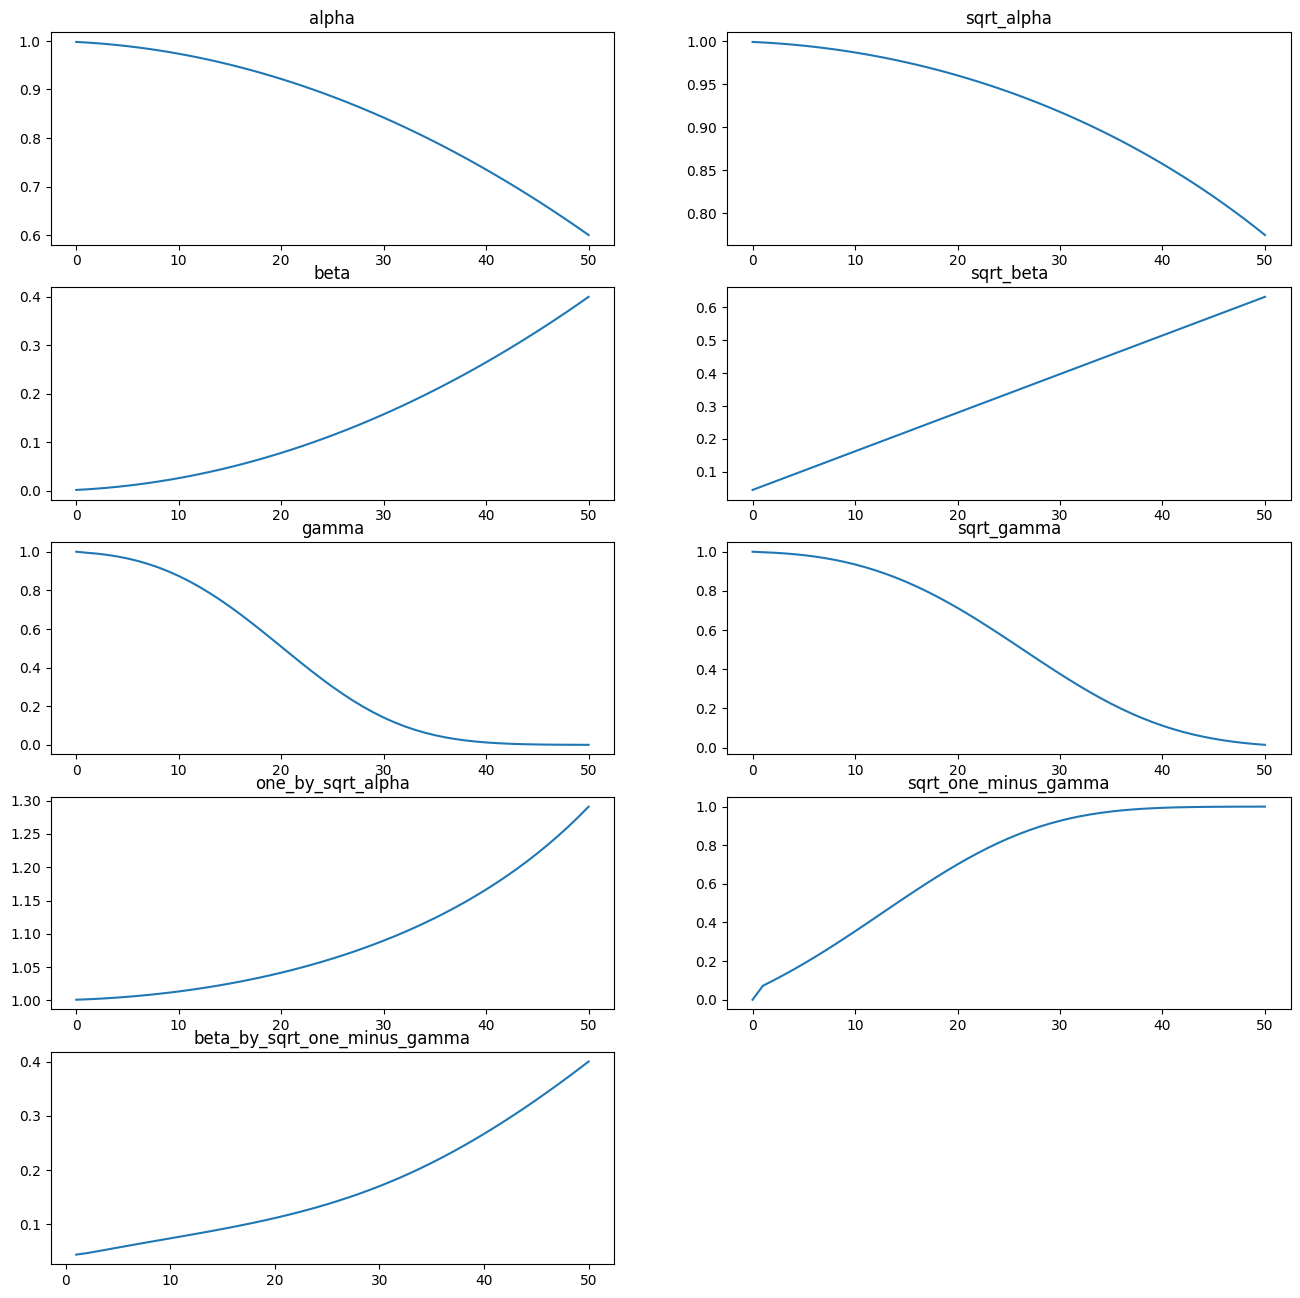

In [1]:
import numpy as np
import torch
from datetime import datetime
from torchvision import transforms
import matplotlib.pyplot as plt
from model.t5 import t5_encode_text

class DiffusionModel():
  # return beta_sqrt, alpha, alpha_sqrt, gamma, gamma_sqrt for noise and denoise image
  def __init__(self, timesteps, height, beta1=0.0001, beta2=0.02):
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
    scale = 1000 / timesteps
    beta1 = scale * beta1
    beta2 = scale * beta2
    beta = torch.linspace(beta1**0.5, beta2**0.5, timesteps + 1, device=self.device)**2
    alpha = 1 - beta
    one_by_sqrt_alpha = 1./alpha.sqrt()
    gamma = torch.cumprod(alpha, axis=0)
    gamma[0] = 1
    sqrt_one_minus_gamma = (1. - gamma).sqrt()
    beta_by_sqrt_one_minus_gamma = beta/sqrt_one_minus_gamma
    self.noise_schedule_dict = {'alpha':alpha, 'sqrt_alpha':alpha.sqrt(),
                   'beta':beta, 'sqrt_beta':beta.sqrt(),
                   'gamma':gamma, 'sqrt_gamma':gamma.sqrt(),
                   'one_by_sqrt_alpha':one_by_sqrt_alpha,
                   'sqrt_one_minus_gamma':sqrt_one_minus_gamma,
                   'beta_by_sqrt_one_minus_gamma':beta_by_sqrt_one_minus_gamma}
    self.timesteps = timesteps
    self.height = height

  def show_noise_schedule(self):
    rows = 5
    cols = 2
    plt.figure(figsize=(16,16))
    for i, schedule in enumerate(self.noise_schedule_dict):
      plt.subplot(rows, cols, i + 1)
      plt.title(schedule)
      curr_schedule = self.noise_schedule_dict[schedule]
      plt.plot(curr_schedule.to('cpu'))
        
df = DiffusionModel(50,128)
df.show_noise_schedule()

Timestep 1000
EPS -> Mean: -0.0016917642205953598, std: 0.9901981949806213
SAMPLES -> Mean: -0.01160917803645134, std: 1.0128921270370483
Timestep 950
EPS -> Mean: -0.0009018940618261695, std: 0.9874703288078308
SAMPLES -> Mean: -0.001515616662800312, std: 1.0069266557693481
Timestep 900
EPS -> Mean: 0.00036450353218242526, std: 0.9910547137260437
SAMPLES -> Mean: 0.004698649514466524, std: 1.0167224407196045
Timestep 850
EPS -> Mean: -0.00039864983409643173, std: 0.9912339448928833
SAMPLES -> Mean: -0.0012906109914183617, std: 1.0157815217971802
Timestep 800
EPS -> Mean: -0.0005427529104053974, std: 0.9922665357589722
SAMPLES -> Mean: -0.004923766478896141, std: 1.0212570428848267
Timestep 750
EPS -> Mean: 0.00011545031884452328, std: 0.9939801692962646
SAMPLES -> Mean: -0.008337266743183136, std: 1.02076256275177
Timestep 700
EPS -> Mean: 0.0011115700472146273, std: 0.9950549006462097
SAMPLES -> Mean: -0.009928068146109581, std: 1.0158069133758545
Timestep 650
EPS -> Mean: 0.00146660

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


EPS -> Mean: -0.011887680739164352, std: 0.7357141375541687
SAMPLES -> Mean: -0.029632411897182465, std: 0.5624502897262573
Timestep 1
EPS -> Mean: -0.013570629060268402, std: 0.6994766592979431
SAMPLES -> Mean: -0.029536079615354538, std: 0.5620312094688416


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([[[-0.3491, -0.3298, -0.3016,  ..., -0.2494, -0.2368, -0.3298],
         [-0.2814, -0.3049, -0.3027,  ..., -0.3982, -0.3351, -0.3537],
         [-0.3540, -0.3971, -0.3572,  ..., -0.3894, -0.3638, -0.4222],
         ...,
         [-0.9442, -1.0390, -1.0176,  ..., -1.0215, -0.9838, -0.9125],
         [-1.0280, -0.9921, -1.0202,  ..., -0.9902, -1.0063, -0.9582],
         [-1.0669, -1.1021, -1.0926,  ..., -1.0218, -1.0578, -1.0420]],

        [[ 0.3811,  0.4506,  0.4001,  ...,  0.3944,  0.4055,  0.3673],
         [ 0.3956,  0.3953,  0.3881,  ...,  0.3386,  0.3485,  0.3012],
         [ 0.3926,  0.3414,  0.4137,  ...,  0.3564,  0.3572,  0.2988],
         ...,
         [-0.2861, -0.3120, -0.3448,  ..., -0.3516, -0.2941, -0.2816],
         [-0.3297, -0.2583, -0.2521,  ..., -0.3851, -0.3582, -0.4014],
         [-0.3821, -0.4235, -0.4249,  ..., -0.3887, -0.5110, -0.4761]],

        [[ 0.7119,  0.8030,  0.7988,  ...,  0.7370,  0.7685,  0.6968],
         [ 0.7829,  0.7320,  0.7820,  ...,  0

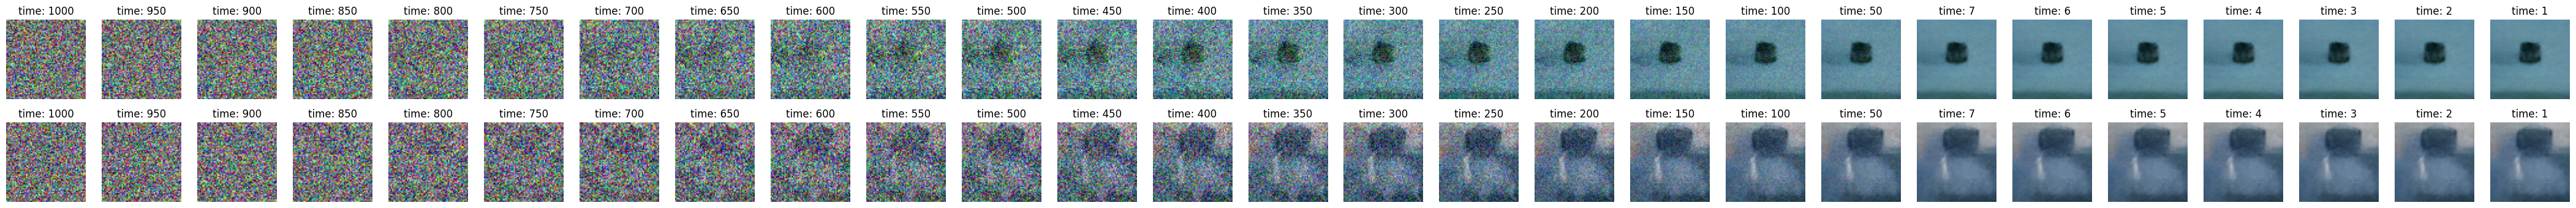

In [13]:
from model.diffusionModel import DiffusionModel
from model.unet import Unet
import matplotlib.pyplot as plt
import torch


# network hyperparameters
batch_size = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 1024 # hidden dimension feature
max_text_len = 128 # word vector
height = 64 # 64x64 image
save_dir = './weights_dogs/'
# diffusion hyperparameters
timesteps = 1000

df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
model.load_state_dict(torch.load(save_dir+"model_1401.pth", map_location=device))

model.eval()
#model.train()

a = (' Black dog',' White dog')

samples = df.sample_ddpm_context(model, 2, a,save_rate=timesteps//20)
df.draw_samples_process(path='./generated_images/')
print(samples[0])
"""
samples = samples.detach().cpu().numpy()
for i, img in enumerate(samples):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    img = df.unorm(img)
    plt.imshow(img.permute(1,2,0))
"""

print('Imagenes generadas')

In [9]:


df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
model.load_state_dict(torch.load(save_dir+"model_1401.pth", map_location=device))
optimizer = Adam(model.parameters(), lr=learning_rate)
open(log_file, 'w').close()
list_total_loss = []
training_steps = 0
model.train()
minu = 1
min_promts = 'a'
promts = []
for epoch in range(1):
    show_msg("------------------------------------ epoch {:03d} ({} steps) ------------------------------------".format(epoch + 1, training_steps))
    total_loss = 0
    loss_list = []
    # linearly decay of learning rate
    #optimizer.param_groups[0]['lr'] = learning_rate*(1-(epoch/n_epoch))
    for x_0, labels in dataloader:   # x_0: images
        optimizer.zero_grad()
        x_0 = x_0.to(device)
        # perturb data
        noise = torch.randn_like(x_0).to(device)
        t = torch.randint(1, timesteps + 1, (x_0.shape[0],)).to(device)
        x_t = df.noise_image(x_0, t, noise).to(device)
        t_emb, t_mask = t5_encode_text(labels)
        # use network to recover noise
        pred_noise = model(x_t, t/timesteps, t_emb=t_emb, t_mask=t_mask)

        # loss is measures the element-wise mean squared error between the predicted and true noise
        loss = F.mse_loss(pred_noise, noise)
        if loss.item() < 3e-2:
            for label in labels:
                promts.append(label)
        if loss.item() < minu:
            min_promts = labels
            minu = loss.item()
        #loss_list.append(loss.item())
        #loss.backward()
        #optimizer.step()
        training_steps+=1
        #if (training_steps%100) == 0:
            #print("Total train step: {}, Loss: {}".format(training_steps,loss))
            
print(promts)
print("------------------------------------")
print(f"promts: {min_promts}, min: {minu}")

------------------------------------ epoch 001 (0 steps) ------------------------------------
[' A black dog barking .', ' brown long-haired dog in garden .', ' Small white dog chases orange ball', ' a tan dog running', ' A dog in the snow', ' A muzzled race dog running', ' White dog retrieving stick from water', ' A dog and two people .', ' Brown dog leaps through field .', ' Brown dog pounces on toy .', ' A dog swims .', ' White dog leaving blue-striped tent .', ' dog jumping for Frisbee', ' A dog leaping off a boat', ' a dog wears jeans .', ' a dog chases a toy .', ' A dog walking on a beach', ' Black dog swimming in water .', ' Orange dog runs across grass .', ' Energetic brown dog running', ' A reddish brown dog running .', ' A dog in a car .', ' Small dog looking into background', ' A black dog running on grass', ' a dog running towards the camera', ' a dog shakes dry .', ' A dog pants inside a car', ' A dog breastfeeding .', ' a dog in the beach', ' dog with something red in mou

torch.return_types.aminmax(
min=tensor(0.2000),
max=tensor(0.9804))
torch.return_types.aminmax(
min=tensor(0.0118),
max=tensor(0.9804))
torch.return_types.aminmax(
min=tensor(0.),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.0275),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.0078),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.2549),
max=tensor(0.7922))
torch.return_types.aminmax(
min=tensor(0.0118),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.3020),
max=tensor(0.9725))
torch.return_types.aminmax(
min=tensor(0.0392),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.0863),
max=tensor(0.8431))
torch.return_types.aminmax(
min=tensor(0.1490),
max=tensor(0.8745))
torch.return_types.aminmax(
min=tensor(0.0980),
max=tensor(0.9922))
torch.return_types.aminmax(
min=tensor(0.0353),
max=tensor(0.9843))
torch.return_types.aminmax(
min=tensor(0.1059),
max=tensor(1.))
torch.return_types.aminmax(
min=tensor(0.1569),
max=tensor(1.))
torch.return

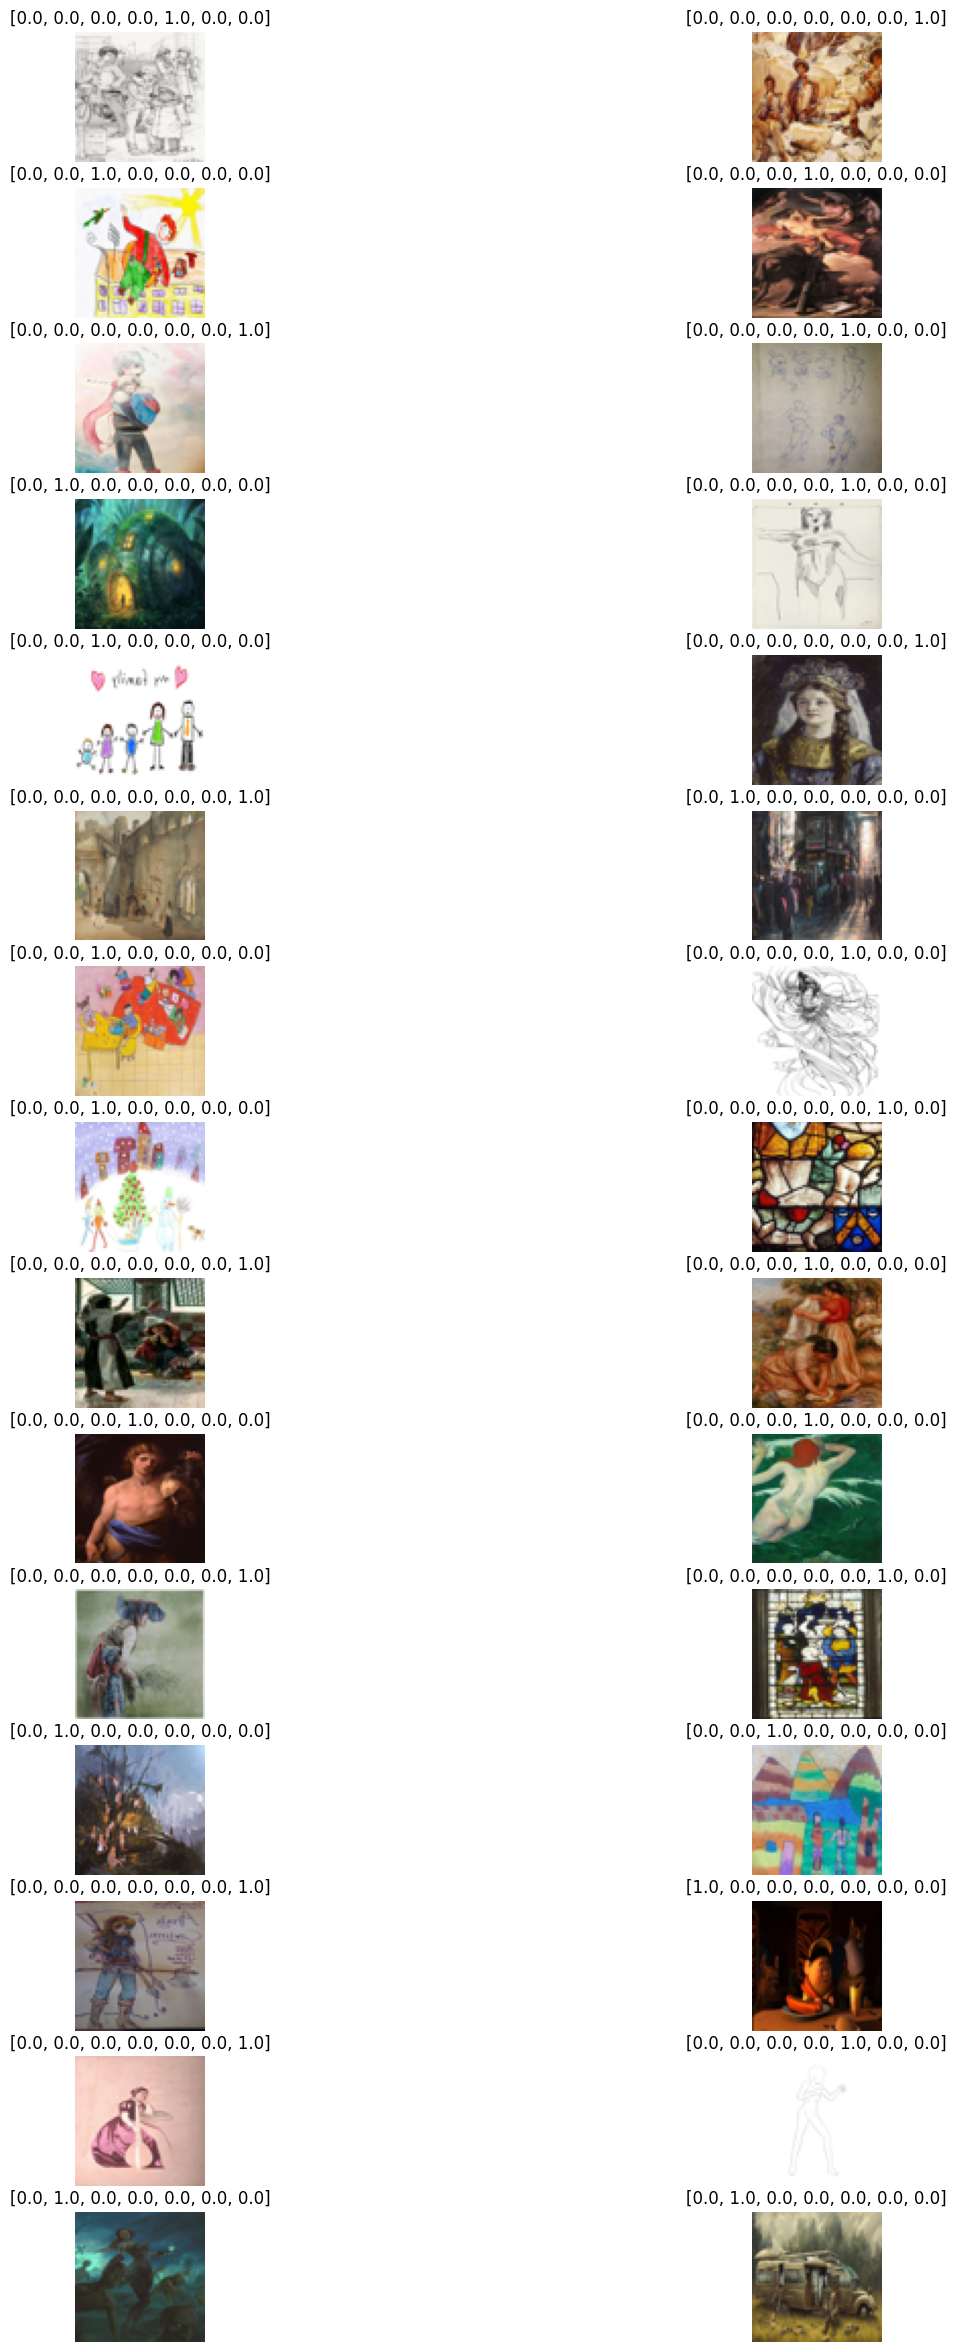

In [4]:
import torch
import matplotlib.pyplot as plt
from model.training import CustomDataset
from model.diffusionModel import DiffusionModel

dataset_name = 'humanart_clases_'

# display samples from a dataset randomly using Gaussian distribution
def show_samples(dataset=None, num_samples=30, cols=1):
    """ Plots some samples from the dataset """
    if dataset is None:
        dataset = CustomDataset('./Image_to_Image/'+dataset_name+'.npy')
    df = DiffusionModel(500, 64)

    rows = int(num_samples / cols)
    if num_samples%cols!=0:
        rows += 1
    plt.figure(figsize=(16,rows*2))
    random_idx = torch.randint(0,len(dataset),(num_samples,))
    for i, idx in enumerate(random_idx):
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        img, curr_label = dataset[int(idx)]
        print(img.aminmax())
        #img = df.unorm(img)
        plt.title(curr_label)
        plt.imshow(img.permute(1,2,0))
    
    plt.savefig(f'./dataset_samples/dataset_samples_'+dataset_name+'.png')
    img, curr_label = dataset[int(16)]
        
show_samples(cols=2)

In [2]:
from model.unet import Unet
from model.training import *
from model.diffusionModel import DiffusionModel
from torch.utils.data import DataLoader
from torch.optim import Adam
from model.t5 import t5_encode_text
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np

dataset_data_path = './dataset/humanart_clases.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1, drop_last=True)
print(len(dataset))
for img,label in dataloader:
    print(label)
    

14000


AttributeError: 'list' object has no attribute 'sum'

In [5]:
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
file = np.load('./dataset/humanart_clases.npy', allow_pickle = True)
labels = np.load('./Image_to_Image/labels.npy', allow_pickle = True)
dataset = file.item()['dataset']
len_ = file.item()['length']
name = file.item()['name']

In [6]:

count=0
Flickr30k = dict()
Flickr30k['name'] = 'humanart_clases'
Flickr30k['shape'] = (3, 64, 64)
dataset_ = dict()
for i in range(len_):
    img = dataset[count]['img']
    dataset_[count] ={'img':img,'label':torch.tensor(labels[count])}
    count = count+1
    if count%1000 == 0:
        print(img)
        print(f"save {count} imgs")

Flickr30k['dataset'] = dataset
Flickr30k['length'] = len(dataset)
np.save(f'./Image_to_Image/humanart_clases_.npy', Flickr30k)

<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A80A7E5D0>
save 1000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A808A26C0>
save 2000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A8041AD50>
save 3000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A8031A5D0>
save 4000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A80215E20>
save 5000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A801116A0>
save 6000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A8000CF20>
save 7000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A80A60920>
save 8000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A7FDD4710>
save 9000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A7FCA7F50>
save 10000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A7FBA37D0>
save 11000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A7FA9F050>
save 12000 imgs
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F2A7F99A8D0>
save 13000 